# Execution of different clique finding algorithms

In [2]:
from libs import *
files = {
    "rtts" : "temp/rtt_distances_eu.json"
}

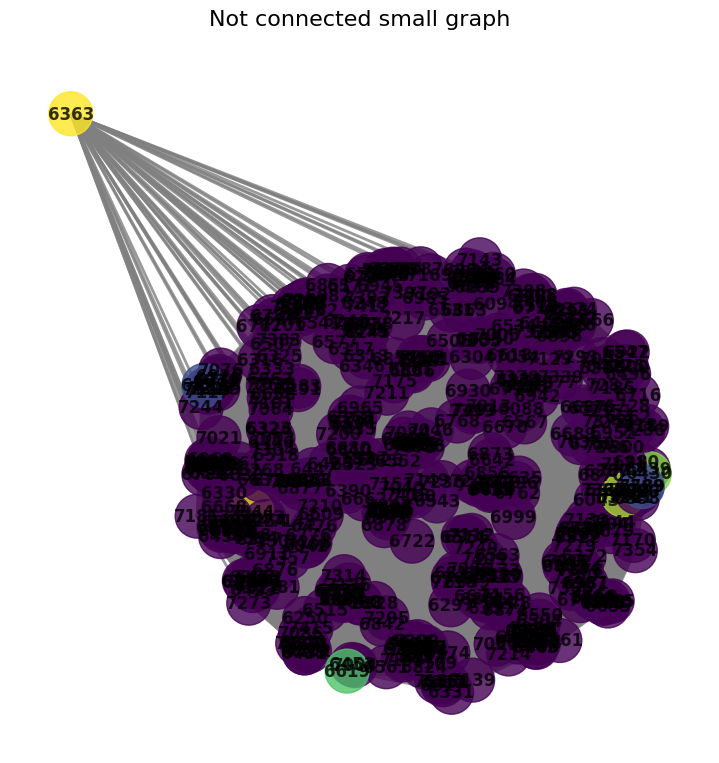

Graph Analysis:
Number of nodes: 455
Number of edges: 102576
Average degree: 450.88
Density: 0.993
473249 cliques are present in the Graph

5 Largest Cliques:
	Clique 1: Size=419, Nodes=['6213', '6423', '6087', '6348', '6384', '6387', '6366', '6297', '6374', '6082', '6248', '6324', '6413', '6246', '6304', '6350', '6251', '6329', '6272', '6400', '6424', '6245', '6336', '6225', '6385', '6332', '6316', '6327', '6317', '6094', '6396', '6372', '6307', '6351', '6333', '6267', '6352', '6368', '6254', '6382', '6390', '6320', '6330', '6360', '6088', '6395', '6239', '6325', '6313', '6334', '6250', '6761', '6919', '7210', '7109', '6603', '6810', '6846', '6866', '6717', '7188', '6911', '6985', '6561', '6604', '7071', '7022', '7125', '6736', '6980', '6577', '7035', '6762', '6900', '6476', '7217', '6979', '6731', '6581', '6751', '6776', '6952', '6523', '6874', '6737', '6496', '6658', '6999', '6445', '6559', '7144', '7003', '6880', '7096', '7156', '6696', '7034', '6519', '6856', '7195', '7005', '6536

In [ ]:
rtts = files["rtts"]
G_rtts = load_graph_from_json(rtts)
visualize_graph_customized(G_rtts, "Not connected small graph", layout="spring", dims=(7, 7))
rtts_largest = set(analyze_graph(G_rtts))

print("Carraghan-Pardalos experiment")
# cp_solver: CarraghanPardalosCF = CarraghanPardalosCF(G_rtts)
# rtts_max_clique_cp: set = cp_solver.find_maximum_clique()
rtts_max_clique_cp = carraghan_pardalos_maximal_clique(G_rtts)
rtts_intersection_set_cp = rtts_largest.intersection(rtts_max_clique_cp)

print(f"Maximum clique {len(rtts_max_clique_cp)}: {rtts_max_clique_cp}")
print(f"CP intersection set {len(rtts_intersection_set_cp)}: {rtts_intersection_set_cp}")
print("-"*100)

print("Bron-Kerbosh experiment")
bk_solver = BronKerbosch(G_rtts)
rtts_max_clique_bk: set = bk_solver.find_max_clique()
rtts_intersection_set_bk = rtts_largest.intersection(rtts_max_clique_bk)

print(f"Maximum clique {len(rtts_max_clique_bk)} {type(rtts_max_clique_bk)}: {rtts_max_clique_bk}")
print(f"BK intersection set {len(rtts_intersection_set_bk)}: {rtts_intersection_set_bk}")
print("-"*100)


print("Tabu-Search experiment")
tabu_solver: TabuCliqueFinder = TabuCliqueFinder(G_rtts, tabu_tenure=20, max_iterations=300)
rtts_max_clique_tabu: set = tabu_solver.find_maximum_clique()
rtts_intersection_set_tabu = rtts_largest.intersection(rtts_max_clique_tabu)

print(f"Maximum clique {len(rtts_max_clique_tabu)}: {rtts_max_clique_tabu}")
print(f"Tabu intersection set {len(rtts_intersection_set_tabu)}: {rtts_intersection_set_tabu}")
print("-"*100)